In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error                  # BERAT BERKAY ERKEN 
from sklearn.metrics import mean_squared_error                    #    191180758
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris= load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [25]:
# Create a pandas DataFrame from the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add the target variable (species of Iris) to the DataFrame
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)



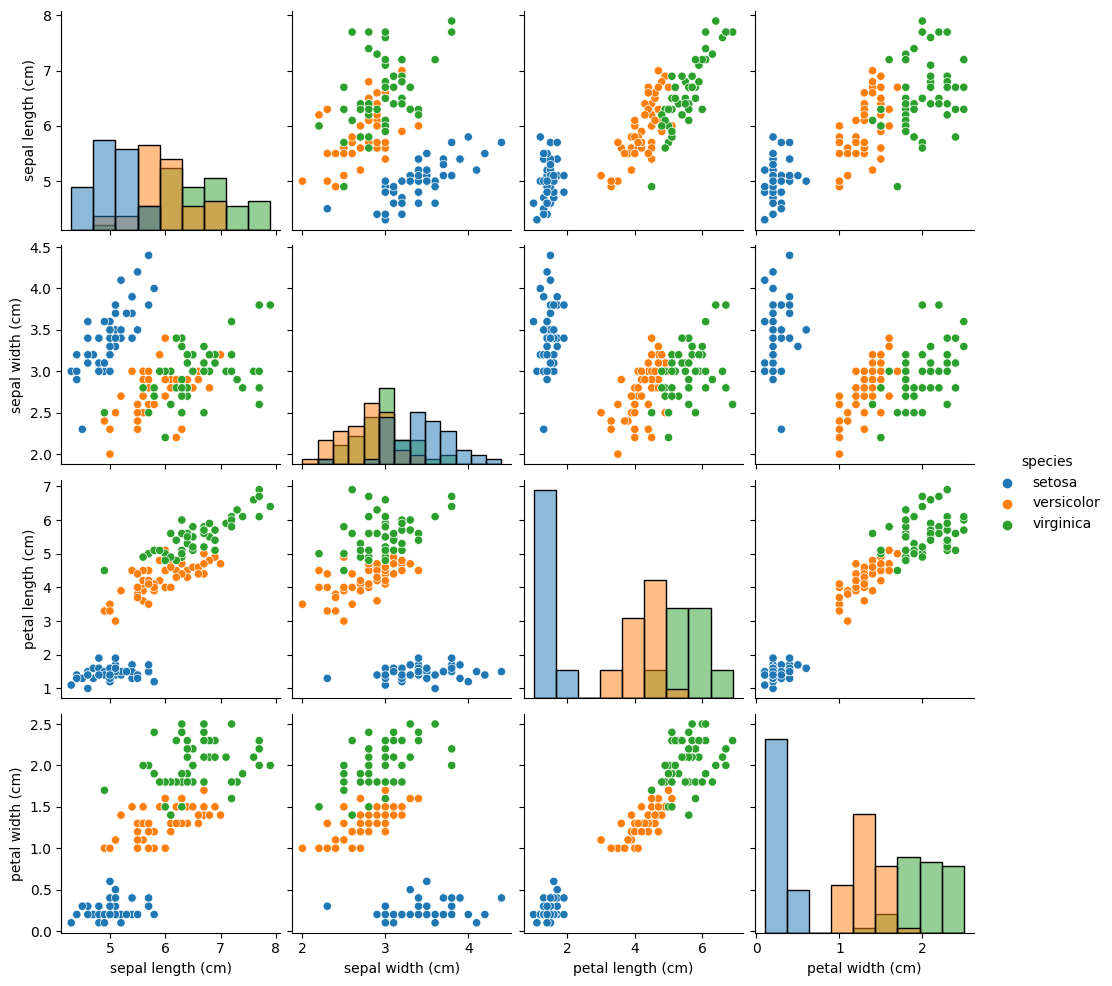

In [26]:
# 1. Plot (scatter plot matrix) the Iris flower dataset. The matrix should include individual scatter
#plots for every combination of variables in the Iris flower dataset. A scatter plot matrix can
#help you observe linear correlations/relationships between multiple variables. In the diagonal,
#you should show the histograms of each variable. You should also color code each data
#instance (Iris flower) on the scatter plots. You can use seaborn to visualize.

# Create a scatter plot matrix
sns.pairplot(df, hue='species', diag_kind='hist')

In [27]:
# Deleting 'sepal length (cm)' and 'sepal width (cm)'
del df['sepal length (cm)']
del df['sepal width (cm)']

df

,petal length (cm),petal width (cm),species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa
...,...,...,...
145,5.2,2.3,virginica
146,5.0,1.9,virginica
147,5.2,2.0,virginica
148,5.4,2.3,virginica


In [28]:
# 2. You will split the dataset into two sets: train and test set. You should first shuffle your data,
#and then split %70 of the dataset for training and %30 for testing.

# Shuffle the data and split the data into X and y

X_train, X_test, y_train, y_test =train_test_split(df['petal width (cm)'], df['petal length (cm)'], random_state=0, test_size= 0.3)

In [29]:
# 3. You will train a Linear Regression model that learns from the training set to predict the Petal
#Length (cm) of the Iris flowers. You can use scikit-learn for this.


# Training a Linear Regression model
lr= LinearRegression()

# Reshaping for Numpy because numpy need two dimension. Reshaping means changing the shape of an array.
#The shape of an array is the number of elements in each dimension.
#By reshaping we can add or remove dimensions or change number of elements in each dimension.
lr.fit(X_train.values.reshape(-1,1), y_train.values)
# Python predict() function enables us to predict the labels of the data values on the basis of the trained model. 
pred=lr.predict(X_test.values.reshape(-1,1))
pred

array([6.45540416, 3.31856897, 1.52609173, 5.11104622, 1.52609173,
       6.67946381, 1.75015138, 4.43886725, 4.2148076 , 3.99074794,
       4.2148076 , 4.43886725, 3.76668829, 4.43886725, 4.2148076 ,
       1.30203207, 4.43886725, 3.76668829, 1.75015138, 1.97421104,
       5.55916553, 4.43886725, 1.52609173, 1.52609173, 5.11104622,
       1.52609173, 1.97421104, 3.99074794, 3.31856897, 1.97421104,
       5.11104622, 4.43886725, 1.52609173, 5.11104622, 6.00728484,
       4.2148076 , 1.75015138, 4.66292691, 4.43886725, 3.76668829,
       5.78322519, 1.52609173, 6.2313445 , 2.42233035, 1.52609173])

In [30]:
# 4. You will test your model on the test set. For all the instances (=flowers) in the test set, you will
#be computing and outputting two different metrics: the Mean Absolute Error and the Mean
#Squared Error. In order to compute these error values, you should compare the predicted
#value for the petal length and the actual value for the petal length.

# Difference between actual value and predicted value
print("Predicted value and actual value differences :")
print(np.array(np.abs(y_test - pred)))

# Compute and output the Mean Absolute Error and Mean Squared Error by using sklearn.metrics mean_absolute_error and mean_squared_error
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error:{mse:.2f}")

Predicted value and actual value differences :
[1.35540416 0.68143103 0.12609173 1.18895378 0.02609173 0.67946381
 0.45015138 0.26113275 0.5851924  0.00925206 1.3851924  0.06113275
 0.93331171 0.16113275 0.4851924  0.09796793 0.06113275 0.63331171
 0.35015138 0.67421104 0.65916553 0.06113275 0.37390827 0.12609173
 0.31104622 0.52609173 0.07421104 0.30925206 0.01856897 0.37421104
 0.38895378 0.06113275 0.02609173 0.21104622 0.40728484 0.3148076
 0.05015138 0.43707309 0.23886725 0.23331171 0.28322519 0.22609173
 1.1313445  0.82233035 0.02609173]
Mean Absolute Error: 0.40
Mean Squared Error:0.29


In [31]:
# 5. You will pick a random flower from the test set, and output its features. Then, you should use
#the trained model to predict the petal length of this specific flower. Please output the
#predicted value for the petal length and the actual value for the petal length. Calculate and
#output the difference between the predicted and actual values. Then calculate and output the
#Mean Squared Error for this specific test.,


# Pick a random flower from the data
random_index = np.random.randint(0,45)
print("Random index:",random_index)
print(df.loc[random_index])
# Show a random flower's predict and show mean squarred error
print(f"Predicted Petal Length (cm): { pred[random_index]:.1f}" )
print(f"Actual Petal Length: {df.loc[random_index]['petal length (cm)']:.1f}")
print(f"Mean Squarred Error is: {np.mean(np.square(np.abs(df.loc[random_index]['petal length (cm)'] - pred[random_index]))):.2f}")



Random index: 18
petal length (cm)       1.7
petal width (cm)        0.3
species              setosa
Name: 18, dtype: object
Predicted Petal Length (cm): 1.8
Actual Petal Length: 1.7
Mean Squarred Error is: 0.00


In [32]:
# 6. You will fit a polynomial of degree 1, basically a line, to the data using the polyfit() function
#from NumPy, and output the equation in the form of mx + b = 0.

# Fit a polynomial of degree 1 to the data. Numpy polyfit() is a method that fits the data within a polynomial function. 
# That is, it least squares the function polynomial fit
deg1 = np.polyfit(X_test, y_test, deg=1)

# Output the equation of the polynomial in the form of mx + b = 0
print(f"The Equation is :{deg1[0]:.3f}x + {deg1[1]:.3f}=0")

The Equation is :2.197x + 1.103=0


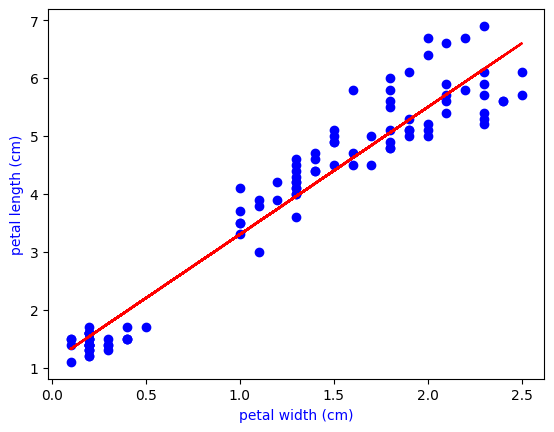

In [33]:
# 7. Plot the polynomial of degree (line) on a scatter plot that shows the data instances (Iris flowers)
#and their Petal Width and Petal Length values on the axes.

# Plot the data points
plt.scatter(X_train, y_train, c='blue')

# Plot the fitted line
plt.plot(X_train, deg1[0] * X_train + deg1[1], color="red")
plt.xlabel('petal width (cm)' ,c='blue')
plt.ylabel('petal length (cm)' ,c='blue')
plt.show()

In [38]:
# 8. Model the data using the parameters of the fitted straight line, and then compute and output
#the value of R², which measures how well the model (the straight line) fits the data.

# Computing and output the value of R^2
# Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model.
r_squared_linear= r2_score(y_test, pred)
print("R^2 Score is:", r_squared_linear)


R^2 Score is: 0.8957237769250189


In [35]:
# 9. You will now fit a second-degree polynomial, basically a curve, to the data using the polyfit()
#function from NumPy, and output the equation in the form of ax2 + bx+ c = 0

# Fit a second-degree polynomial (curve) to the data using the polyfit() function from NumPy
deg2 = np.polyfit(X_test, y_test, deg=2)

# Output the equation in the form of ax2 + bx + c = 0
print("The Equation is: {:.3f}x^2 + {:.3f}x + {:.3f} = 0".format(deg2[0], deg2[1], deg2[2]))

The Equation is: -0.716x^2 + 3.820x + 0.550 = 0


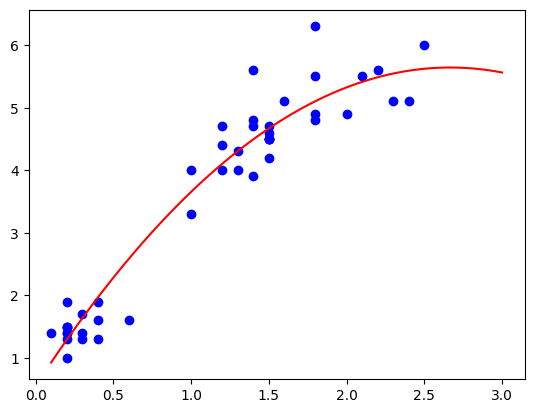

In [36]:
# 10. Plot the second-degree polynomial (curve), on a scatter plot that shows the data instances (Iris
#flowers) and their Petal Width and Petal Length values on the axes.

# Ploting the second-degree polynomial (curve) on a scatter plot
plt.scatter(X_test, y_test, c='blue')

# Generating x values for the curve
x = np.linspace(X_test.min(), X_test.max()+0.5, 100)

# Calculating y values for the curve
y = deg2[0] * x**2 + deg2[1] * x + deg2[2]

# Ploting the curve
plt.plot(x, y, color="red")
plt.show()